<a href="https://colab.research.google.com/github/avsolatorio/RealTabFormer/blob/main/colab/REaLTabFormer_GeoValidator_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#@title REaLTabFormer
%%html

<center>
    <h1>REaLTabFormer</h1>
    <br>
    <div align="center" style="width:70%;">
        <p style="font-size: 1.2em; text-align:justify">The REaLTabFormer (Realistic Relational and Tabular Data using Transformers) offers a unified framework for synthesizing tabular data of different types. A sequence-to-sequence (Seq2Seq) model is used for generating synthetic relational datasets. The REaLTabFormer model for a non-relational tabular data uses GPT-2, and can be used out-of-the-box to model any tabular data with independent observations.</p>
    </div>

    <br>
    <br>
    <br>

    <div style="text-align:center;">
        <img src="https://github.com/avsolatorio/RealTabFormer/raw/main/img/REalTabFormer_Final_EQ.png" style="width:50%"/>

        <p align="center">
            <strong>REaLTabFormer: Generating Realistic Relational and Tabular Data using Transformers</strong>
            <br>
            <a href="https://arxiv.org/abs/2302.02041">Paper on ArXiv</a>
        </p>

    </div>
</center>

# Citation

Please cite our work if you use the REaLTabFormer in your projects or research.

``` bibtex
@article{solatorio2023realtabformer,
  title={REaLTabFormer: Generating Realistic Relational and Tabular Data using Transformers},
  author={Solatorio, Aivin V. and Dupriez, Olivier},
  journal={arXiv preprint arXiv:2302.02041},
  year={2023}
}
```

# Validator Example

The REaLTabFormer framework provides an interface to easily build observation validators for filtering invalid synthetic samples. We show an example of using the `GeoValidator` below. The chart on the left shows the distribution of the generated latitude and longitude without validation. The chart on the right shows the synthetic samples with observations that have been validated using the `GeoValidator` with the California boundary. Still, even when we did not optimally train the model for generating this, the invalid samples (falling outside of the boundary) are scarce from the generated data with no validator.


## Download the required packages

In [ ]:
!pip install geopandas &> /dev/null
!pip install realtabformer &> /dev/null
!git clone https://github.com/joncutrer/geopandas-tutorial.git &> /dev/null

In [5]:
from transformers import logging as hf_logging
hf_logging.set_verbosity_error()

## Import the modules and define the function for plotting

In [6]:
import geopandas
import seaborn as sns
import matplotlib.pyplot as plt
from realtabformer import REaLTabFormer
from realtabformer import rtf_validators as rtf_val
from shapely.geometry import Polygon, LineString, Point, MultiPolygon
from sklearn.datasets import fetch_california_housing

sns.set(rc={"figure.dpi":100})

def plot_sf(data, samples, title=None):
    sns.set_style("white")
    xlims = (-126, -113.5)
    ylims = (31, 43)
    bins = (50, 50)

    dd = samples.copy()
    pp = dd.loc[
        dd["Longitude"].between(data["Longitude"].min(), data["Longitude"].max()) &
        dd["Latitude"].between(data["Latitude"].min(), data["Latitude"].max())
    ]

    g = sns.JointGrid(data=pp, x="Longitude", y="Latitude", marginal_ticks=True)
    g.plot_joint(
        sns.histplot,
        bins=bins,
    )

    states[states['NAME'] == 'California'].boundary.plot(ax=g.ax_joint)
    g.ax_joint.set_xlim(*xlims)
    g.ax_joint.set_ylim(*ylims)

    g.plot_marginals(sns.histplot, element="step", color="#03012d")

    if title:
        g.ax_joint.set_title(title)
    
    plt.tight_layout()

## Get geographic files

In [7]:
states = geopandas.read_file('geopandas-tutorial/data/usa-states-census-2014.shp')
states = states.to_crs("EPSG:4326")  # GPS Projection

## Get the California housing dataset

In [8]:
data = fetch_california_housing(as_frame=True).frame

## Create a model with small epochs for the demo, default is 200.

In [9]:
rtf_model = REaLTabFormer(
    model_type="tabular",
    batch_size=64,
    epochs=10,
    gradient_accumulation_steps=4,
    logging_steps=100)

## Fit the specified model. We also reduce the num_bootstrap, default is 500.

In [10]:
hf_logging.set_verbosity_error()
rtf_model.fit(data, num_bootstrap=10)

Computing the sensitivity threshold...


/usr/local/lib/python3.8/dist-packages/realtabformer/realtabformer.py:566: UserWarning: Duplicate rate (0.0) in the data is zero. The `qt_interval` will be set                     to qt_interval_unique=100.
  warnings.warn(


Bootstrap round:   0%|          | 0/10 [00:00<?, ?it/s]

Sensitivity threshold summary:
count    10.000000
mean      0.000677
std       0.001524
min      -0.001577
25%      -0.000497
50%       0.000731
75%       0.001708
max       0.003260
dtype: float64
Sensitivity threshold: 0.0027569456681350944 qt_max: 0.05


  0%|          | 0/20640 [00:00<?, ?ex/s]

Using cuda_amp half precision backend
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 20640
  Num Epochs = 5
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 256
  Gradient Accumulation steps = 4
  Total optimization steps = 400
  Number of trainable parameters = 43629312
Saving model checkpoint to rtf_checkpoints/checkpoint-80
Configuration saved in rtf_checkpoints/checkpoint-80/config.json
Configuration saved in rtf_checkpoints/checkpoint-80/generation_config.json
Model weights saved in rtf_checkpoints/checkpoint-80/pytorch_model.bin
Saving model checkpoint to rtf_checkpoints/checkpoint-100
Configuration saved in rtf_chec

{'loss': 1.6868, 'learning_rate': 4.375e-05, 'epoch': 1.25}


Model weights saved in rtf_checkpoints/checkpoint-100/pytorch_model.bin
Saving model checkpoint to rtf_checkpoints/checkpoint-160
Configuration saved in rtf_checkpoints/checkpoint-160/config.json
Configuration saved in rtf_checkpoints/checkpoint-160/generation_config.json
Model weights saved in rtf_checkpoints/checkpoint-160/pytorch_model.bin
Saving model checkpoint to rtf_checkpoints/checkpoint-200
Configuration saved in rtf_checkpoints/checkpoint-200/config.json
Configuration saved in rtf_checkpoints/checkpoint-200/generation_config.json


{'loss': 1.3151, 'learning_rate': 3.7500000000000003e-05, 'epoch': 2.5}


Model weights saved in rtf_checkpoints/checkpoint-200/pytorch_model.bin
Saving model checkpoint to rtf_checkpoints/checkpoint-240
Configuration saved in rtf_checkpoints/checkpoint-240/config.json
Configuration saved in rtf_checkpoints/checkpoint-240/generation_config.json
Model weights saved in rtf_checkpoints/checkpoint-240/pytorch_model.bin
Saving model checkpoint to rtf_checkpoints/checkpoint-300
Configuration saved in rtf_checkpoints/checkpoint-300/config.json
Configuration saved in rtf_checkpoints/checkpoint-300/generation_config.json


{'loss': 1.2829, 'learning_rate': 3.125e-05, 'epoch': 3.74}


Model weights saved in rtf_checkpoints/checkpoint-300/pytorch_model.bin
Saving model checkpoint to rtf_checkpoints/checkpoint-320
Configuration saved in rtf_checkpoints/checkpoint-320/config.json
Configuration saved in rtf_checkpoints/checkpoint-320/generation_config.json
Model weights saved in rtf_checkpoints/checkpoint-320/pytorch_model.bin
Deleting older checkpoint [rtf_checkpoints/checkpoint-80] due to args.save_total_limit
Saving model checkpoint to rtf_checkpoints/checkpoint-400
Configuration saved in rtf_checkpoints/checkpoint-400/config.json
Configuration saved in rtf_checkpoints/checkpoint-400/generation_config.json


{'loss': 1.2681, 'learning_rate': 2.5e-05, 'epoch': 4.99}


Model weights saved in rtf_checkpoints/checkpoint-400/pytorch_model.bin
Deleting older checkpoint [rtf_checkpoints/checkpoint-100] due to args.save_total_limit
Saving model checkpoint to rtf_checkpoints/checkpoint-400
Configuration saved in rtf_checkpoints/checkpoint-400/config.json
Configuration saved in rtf_checkpoints/checkpoint-400/generation_config.json
Model weights saved in rtf_checkpoints/checkpoint-400/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)




{'train_runtime': 249.8925, 'train_samples_per_second': 412.978, 'train_steps_per_second': 1.601, 'train_loss': 1.3882351684570313, 'epoch': 4.99}


  0%|          | 0/10215 [00:00<?, ?it/s]

Generate config GenerationConfig {
  "bos_token_id": 5,
  "eos_token_id": 6,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "bos_token_id": 5,
  "eos_token_id": 6,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "bos_token_id": 5,
  "eos_token_id": 6,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "bos_token_id": 5,
  "eos_token_id": 6,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "bos_token_id": 5,
  "eos_token_id": 6,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "bos_token_id": 5,
  "eos_token_id": 6,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "bos_token_id": 5,
  "eos_token_id": 6,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "bos_token_id": 5,
  "eos_token_id": 6,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "bos_token_id": 5,
  "eos_token_id": 6,
  "

Generated 0 invalid samples out of total 10240 samples generated. Sampling efficiency is: 100.0000%


Saving model checkpoint to rtf_checkpoints/best-disc-model
Configuration saved in rtf_checkpoints/best-disc-model/config.json
Configuration saved in rtf_checkpoints/best-disc-model/generation_config.json
Model weights saved in rtf_checkpoints/best-disc-model/pytorch_model.bin
Saving model checkpoint to rtf_checkpoints/mean-best-disc-model
Configuration saved in rtf_checkpoints/mean-best-disc-model/config.json
Configuration saved in rtf_checkpoints/mean-best-disc-model/generation_config.json
Model weights saved in rtf_checkpoints/mean-best-disc-model/pytorch_model.bin
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Using cuda_amp half precision backend
Loading model from rtf_checkpoints/checkpoint-400.


Critic round: 5,                     sensitivity_threshold: 0.0027569456681350944,                         val_sensitivity: -0.002142398433675967,                             val_sensitivities: [-0.002029662261380323, -0.0002775330396475768, -0.0022998531571218794, -0.0010734214390602057, -0.0023662261380323047, -0.002955359765051394, -0.0006769456681350952, -0.0014745961820851689, -0.002355066079295154, -0.0031838472834067556, 0.0005301027900146845, -0.002637591776798825, -0.001762408223201174, -0.005767107195301029, -0.0038064610866372995]


/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 20640
  Num Epochs = 10
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 256
  Gradient Accumulation steps = 4
  Total optimization steps = 800
  Number of trainable parameters = 43629312
  Continuing training from checkpoint, will skip to saved global_step
  Continuing training from epoch 5
  Continuing training from global step 400
  Will skip the first 5 epochs then the first 0 batches in the first epoch. If this takes a lot of time, you can add the `--ignore_data_skip` flag to your launch command, but you will resume the training on data already seen by your model.


0it [00:00, ?it/s]

Step,Training Loss
500,1.256500
600,1.248600
700,1.243900
800,1.239900


Saving model checkpoint to rtf_checkpoints/checkpoint-480
Configuration saved in rtf_checkpoints/checkpoint-480/config.json
Configuration saved in rtf_checkpoints/checkpoint-480/generation_config.json
Model weights saved in rtf_checkpoints/checkpoint-480/pytorch_model.bin
Deleting older checkpoint [rtf_checkpoints/checkpoint-160] due to args.save_total_limit
Saving model checkpoint to rtf_checkpoints/checkpoint-500
Configuration saved in rtf_checkpoints/checkpoint-500/config.json
Configuration saved in rtf_checkpoints/checkpoint-500/generation_config.json
Model weights saved in rtf_checkpoints/checkpoint-500/pytorch_model.bin
Deleting older checkpoint [rtf_checkpoints/checkpoint-200] due to args.save_total_limit
Saving model checkpoint to rtf_checkpoints/checkpoint-560
Configuration saved in rtf_checkpoints/checkpoint-560/config.json
Configuration saved in rtf_checkpoints/checkpoint-560/generation_config.json
Model weights saved in rtf_checkpoints/checkpoint-560/pytorch_model.bin
Delet

  0%|          | 0/10215 [00:00<?, ?it/s]

Generate config GenerationConfig {
  "bos_token_id": 5,
  "eos_token_id": 6,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "bos_token_id": 5,
  "eos_token_id": 6,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "bos_token_id": 5,
  "eos_token_id": 6,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "bos_token_id": 5,
  "eos_token_id": 6,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "bos_token_id": 5,
  "eos_token_id": 6,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "bos_token_id": 5,
  "eos_token_id": 6,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "bos_token_id": 5,
  "eos_token_id": 6,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "bos_token_id": 5,
  "eos_token_id": 6,
  "transformers_version": "4.26.0"
}

Generate config GenerationConfig {
  "bos_token_id": 5,
  "eos_token_id": 6,
  "

Generated 0 invalid samples out of total 10240 samples generated. Sampling efficiency is: 100.0000%


Saving model checkpoint to rtf_checkpoints/best-disc-model
Configuration saved in rtf_checkpoints/best-disc-model/config.json
Configuration saved in rtf_checkpoints/best-disc-model/generation_config.json
Model weights saved in rtf_checkpoints/best-disc-model/pytorch_model.bin
Saving model checkpoint to rtf_checkpoints/last-epoch-model
Configuration saved in rtf_checkpoints/last-epoch-model/config.json
Configuration saved in rtf_checkpoints/last-epoch-model/generation_config.json


Critic round: 10,                     sensitivity_threshold: 0.0027569456681350944,                         val_sensitivity: -0.002315359765051395,                             val_sensitivities: [0.0007086637298091042, 0.0010111600587371517, -0.0004631424375917768, 0.0005541850220264317, -0.0022240822320117475, -0.004285168869309839, -0.0015779735682819379, -0.0019274596182085168, -0.0032654919236417028, -0.003572687224669603, -0.0007480176211453743, -0.004393245227606461, -0.0028602055800293685, -0.006081350954478707, -0.005605580029368575]


Model weights saved in rtf_checkpoints/last-epoch-model/pytorch_model.bin
loading configuration file rtf_checkpoints/best-disc-model/config.json
Model config GPT2Config {
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 5,
  "embd_pdrop": 0.1,
  "eos_token_id": 6,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 6,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "torch_dtype": "float32",
  "transformers_version": "4.26.0",
  "use_cache": true,
  "vocab_size": 409
}

loading weights file rtf_checkpoints/best-disc-model/pytorch_model.bin
Generate config Gen

## Save the trained model

In [11]:
rtf_model.save("rtf_model/")

Copying artefacts from: best-disc-model
Copying artefacts from: mean-best-disc-model
Copying artefacts from: not-best-disc-model
Copying artefacts from: last-epoch-model


# Sampling

## Sample raw data without validator

In [12]:
hf_logging.set_verbosity_error()
samples_raw = rtf_model.sample(n_samples=10240, gen_batch=512)

  0%|          | 0/10240 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 10240 samples generated. Sampling efficiency is: 100.0000%


## Sample data with validator

In [13]:
obs_validator = rtf_val.ObservationValidator()
obs_validator.add_validator(
    "geo_validator",
    rtf_val.GeoValidator(
        MultiPolygon(states[states['NAME'] == 'California'].geometry[0])),
    ("Longitude", "Latitude")
)

hf_logging.set_verbosity_error()
samples_validated = rtf_model.sample(
    n_samples=10240, gen_batch=512,
    validator=obs_validator,
)

  0%|          | 0/10240 [00:00<?, ?it/s]

Generated 560 invalid samples out of total 11264 samples generated. Sampling efficiency is: 95.0284%


# Visualize results

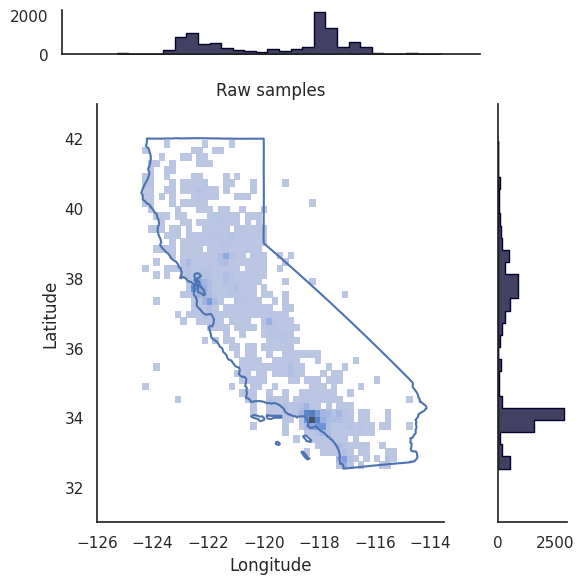

In [14]:
plot_sf(data, samples_raw, title="Raw samples")

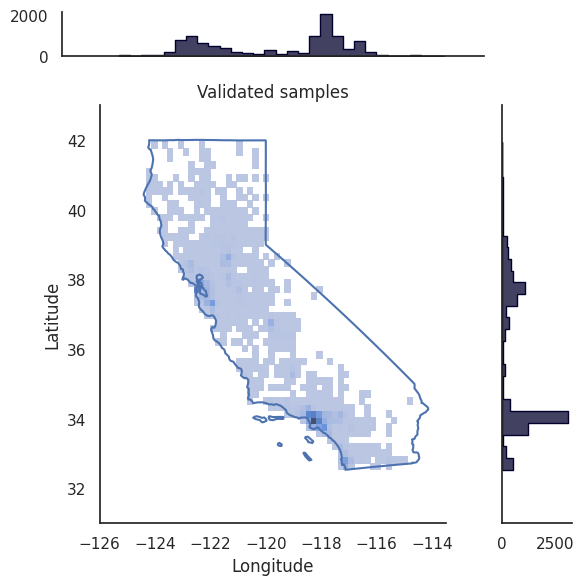

In [15]:
plot_sf(data, samples_validated, title="Validated samples")